       timestamp
0       0.000000
1       0.000405
2       0.000722
3       0.001092
4       0.001599
...          ...
35588  12.037553
35589  12.037886
35590  12.038318
35591  12.038661
35592  12.039023

[35593 rows x 1 columns]
              X         Y         Z  timestamp
0     -0.002909  0.003404 -0.001889   0.000000
1     -0.002909  0.003404 -0.001889   0.000405
2     -0.002911  0.003404 -0.001892   0.000722
3     -0.002911  0.003404 -0.001892   0.001092
4     -0.002911  0.003404 -0.001892   0.001599
...         ...       ...       ...        ...
35588 -0.001915 -0.004334  0.004295  12.037553
35589 -0.001903 -0.004334  0.004271  12.037886
35590 -0.005504 -0.002566  0.008198  12.038318
35591 -0.005504 -0.002566  0.008198  12.038661
35592 -0.005497 -0.002566  0.008181  12.039023

[35593 rows x 4 columns]


Text(0.5, 0.92, 'Displacement error in space over time')

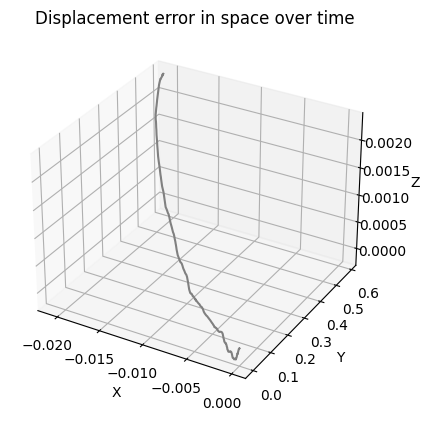

In [19]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


df = pd.read_csv('linear.txt',sep = ",")
df.columns = ["X","Y","Z"]
# df.dtypes

df['X'] = df['X'].astype('string')
df['Z'] = df['Z'].astype('string')
# df.dtypes
# dfc = np.empty((len(df),1))
dfx = df['X']
dfz = df['Z']
# print(dfs)

for i in range(0,len(df)):
    
    dfx.iloc[i] = dfx.iloc[i].replace('(','')
    dfz.iloc[i] = dfz.iloc[i].replace(')','')
    # rows['X'][index] = re.sub(r'[()]', '', rows['X'][index])

# print(dfx)
# print(dfz)

df['X'] = dfx
df['Z'] = dfz
df['X'] = df['X'].astype('float64')
df['Z'] = df['Z'].astype('float64')
# print(df)
# df.dtypes

of = open('Cleaned.csv','w',buffering=1)
df.index.names = ['Index']
df.to_csv(of)
of.close()
# print(dfc)

dft = pd.read_csv("timestamp.txt")

# dft = dft / (10**9)

tInit = dft.iloc[0]

dft = dft - tInit
dft.columns = ['timestamp']
print(dft)


dfCleaned = pd.concat([df,dft], axis = 1)
# print(dfCleaned)
# dfCleaned = dfCleaned.drop_duplicates(subset=['timestamp'])


outF = open('CleanedNoDup.csv','w',buffering=1)
dfCleaned.to_csv(outF)
outF.close()

g = 9.80665

dfCleaned.drop(df.tail(1).index,inplace=True)
print(dfCleaned)

t = dfCleaned["timestamp"].to_numpy()


accelX = dfCleaned["X"].to_numpy()
accelY = dfCleaned["Y"].to_numpy()
accelZ = dfCleaned["Z"].to_numpy()

accelX = accelX * g
accelY = accelY * g
accelZ = accelZ * g

initVelX = 0
initVelY = 0
initVelZ = 0

initPosX = 0
initPosY = 0
initPosZ = 0

velX = scipy.integrate.cumtrapz(accelX,t,initial=initVelX)
posX = scipy.integrate.cumtrapz(velX,t,initial=initPosX)
# print(posX)

velY = scipy.integrate.cumtrapz(accelY,t,initial=initVelY)
posY = scipy.integrate.cumtrapz(velY,t,initial=initPosY)
# print(posY)

velZ = scipy.integrate.cumtrapz(accelZ,t,initial=initVelZ)
posZ = scipy.integrate.cumtrapz(velZ,t,initial=initPosZ)
# posZ1 = scipy.integrate.simps(velZ,t)
# print(type(posZ))
# print(posZ1)
biasX = np.mean(posX)
biasY = np.mean(posY)
biasZ = np.mean(posZ)

posX = posX - biasX
posY = posY - biasY
posZ = posZ - biasZ

print(posX)
print(posY)
print(posZ)

# plt.figure(0)
# plt.plot(t,accelX)

# plt.figure(1)
# plt.plot(t,velX)

# plt.figure(2)
# plt.plot(t,posX)
ax = plt.axes(projection='3d')
zdata = posZ
xdata = posX
ydata = posY

# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.plot3D(xdata, ydata, zdata, 'gray')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Displacement error in space over time")
